<a href="https://colab.research.google.com/github/Nathan499/CS-167/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name:Nathan Larsen

Proposed Points (out of 25): 25

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

I am going to use a convolutional neural network to analyze photos of different gemstones and see if it can correctly use softmax to correctly classify each gemstone. In this test I am going to perform different models with and and smaller kernels to see if this helps with accurcacy. I think that a model with padding and a smaller kernel will perform better. I got my data of the gemstones from Kaggle. Here is the link to the dataset:

https://www.kaggle.com/datasets/lsind18/gemstones-images?resource=download



# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

For the data preparation the first thing that I had to do was download the images from kaggle and then make sure to extract the zip file to my drive. In this section I then proceed to import the functions that I will be using later in the code. I assigned the dimensions of the images and then imported the training and test datasets from the folders within my google drive. I am certain it is prepared to work with the algorithms because of the confirmation at the end stating the number of images along with that there are 87 classes.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load and prepare your data here
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import keras
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys

# dimensions of our images.
img_width = 200
img_height = 200

#the directories where our train and test data is
train_data_dir = '/content/drive/MyDrive/CS 167/Gemstones/train'
test_data_dir = '/content/drive/MyDrive/CS 167/Gemstones/test'

#we will feed the training images to the neural network
#in batches of 32 images at a time so we don't have 
#to load the entire data set into memory
batch_size = 32

# used to rescale the pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

#These will look for our training and testing data
#in their respective directory, and it will figure out
#the class of each example based on the subfolder it is in
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0
Found 2856 images belonging to 87 classes.
Found 363 images belonging to 87 classes.


# 3. Research

Put your code and your experiments here.

Epoch 1/10
90/90 [==============================] - 236s 3s/step - loss: nan - accuracy: 0.0126 - val_loss: nan - val_accuracy: 0.0110
Epoch 2/10
90/90 [==============================] - 16s 173ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 3/10
90/90 [==============================] - 16s 172ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 4/10
90/90 [==============================] - 15s 172ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 5/10
90/90 [==============================] - 15s 171ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 6/10
90/90 [==============================] - 16s 182ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 7/10
90/90 [==============================] - 16s 181ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 8/10
90/90 [=========================

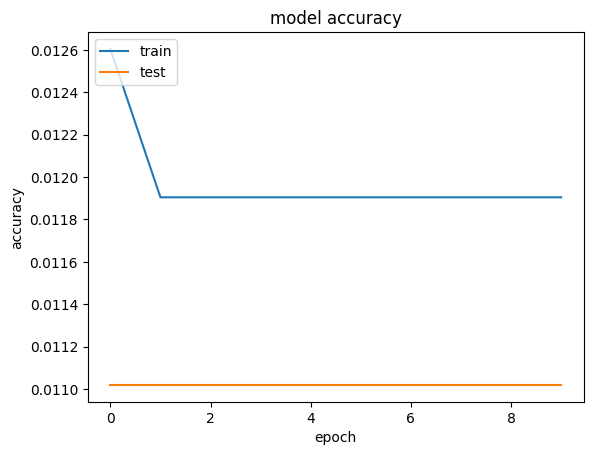

In [6]:
# code goes here... don't forget to include graphs. Professor Urness loves graphs.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential


#setting up a sequential model with 3 convolutional layers, each with 32 feature maps
#from regions that are 3x3 in the image
model = Sequential()
model.add(Conv2D(32, (5, 5), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (5, 5),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1,activation='softmax'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/10
90/90 [==============================] - 16s 177ms/step - loss: nan - accuracy: 0.0126 - val_loss: nan - val_accuracy: 0.0110
Epoch 2/10
90/90 [==============================] - 15s 172ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 3/10
90/90 [==============================] - 18s 198ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 4/10
90/90 [==============================] - 16s 172ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 5/10
90/90 [==============================] - 16s 173ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 6/10
90/90 [==============================] - 16s 173ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 7/10
90/90 [==============================] - 16s 172ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 8/10
90/90 [=======================

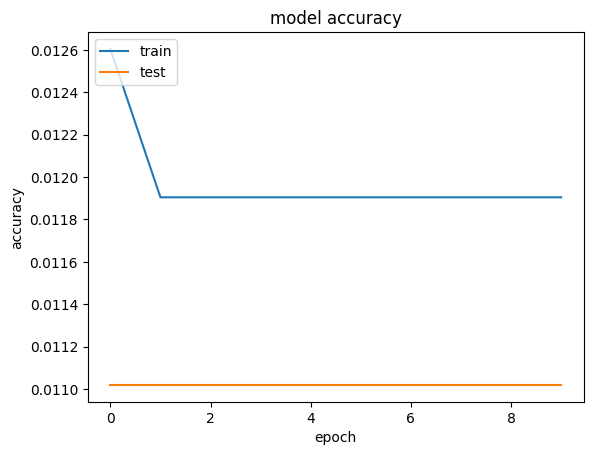

In [7]:
#This is the second portion of my code where I am adding padding
model = Sequential()
model.add(Conv2D(32, (5, 5), activation = 'relu', input_shape=(img_width, img_height, 3), padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (5, 5),activation = 'relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1,activation='softmax'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/10
90/90 [==============================] - 20s 214ms/step - loss: nan - accuracy: 0.0126 - val_loss: nan - val_accuracy: 0.0110
Epoch 2/10
90/90 [==============================] - 18s 195ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 3/10
90/90 [==============================] - 16s 177ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 4/10
90/90 [==============================] - 16s 174ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 5/10
90/90 [==============================] - 16s 181ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 6/10
90/90 [==============================] - 16s 173ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 7/10
90/90 [==============================] - 16s 173ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 8/10
90/90 [=======================

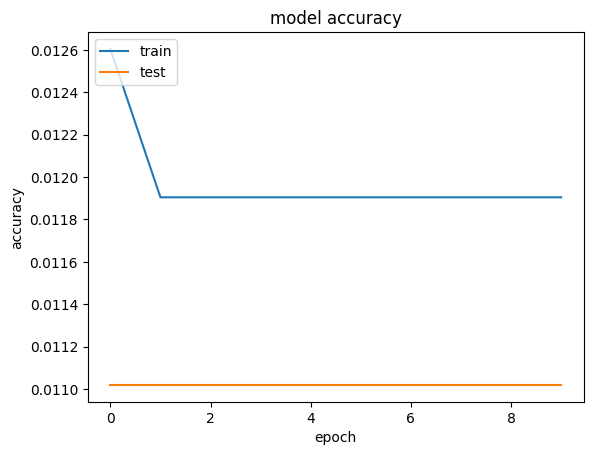

In [8]:
#This is the third portion of my code where I am adding padding and making the kernel smaller to attempt to increase accuracy
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3), padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),activation = 'relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1,activation='softmax'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/10
90/90 [==============================] - 17s 180ms/step - loss: nan - accuracy: 0.0112 - val_loss: nan - val_accuracy: 0.0110
Epoch 2/10
90/90 [==============================] - 17s 186ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 3/10
90/90 [==============================] - 16s 173ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 4/10
90/90 [==============================] - 18s 200ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 5/10
90/90 [==============================] - 16s 175ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 6/10
90/90 [==============================] - 15s 170ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 7/10
90/90 [==============================] - 16s 173ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 8/10
90/90 [=======================

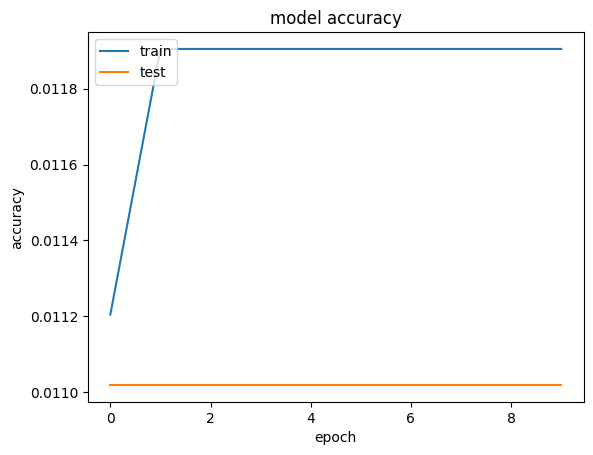

In [9]:
#I am going to attempt to run an extra model to see if adding another conversion and max pooling layer to see if that makes a difference
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3), padding = 'valid'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(32, (3, 3),activation = 'relu', padding = 'valid'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(32, (3, 3),activation = 'relu', padding = 'valid'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Flatten())
model4.add(Dense(32,activation = 'relu'))
model4.add(Dense(1,activation='softmax'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model4.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_results4 = model4.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results4.history['accuracy'])
plt.plot(training_results4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/10
90/90 [==============================] - 18s 186ms/step - loss: nan - accuracy: 0.0109 - val_loss: nan - val_accuracy: 0.0110
Epoch 2/10
90/90 [==============================] - 16s 174ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 3/10
90/90 [==============================] - 15s 172ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 4/10
90/90 [==============================] - 16s 182ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 5/10
90/90 [==============================] - 17s 184ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 6/10
90/90 [==============================] - 16s 173ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 7/10
90/90 [==============================] - 17s 185ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 8/10
90/90 [=======================

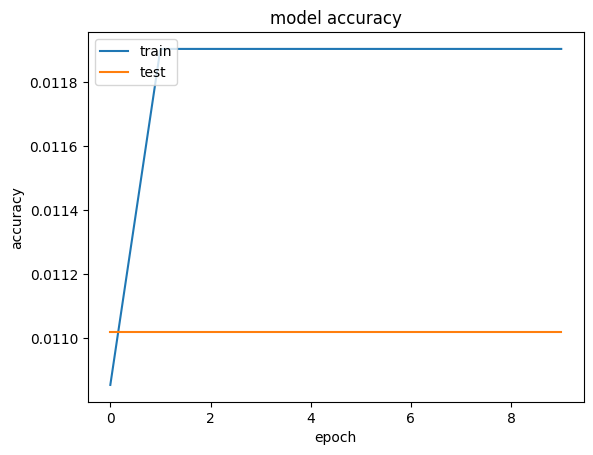

In [11]:
#Lastly I am going to try to lower the momentum to see if that changes anything
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3), padding = 'valid'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(32, (3, 3),activation = 'relu', padding = 'valid'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(32, (3, 3),activation = 'relu', padding = 'valid'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Flatten())
model4.add(Dense(32,activation = 'relu'))
model4.add(Dense(1,activation='softmax'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=.5)
model4.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_results4 = model4.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results4.history['accuracy'])
plt.plot(training_results4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

I discovered mainly that the selection of the datasets is the most important thing because no matter what I did the the convolutional neural network model, it ended up resulting the same. These results were all horrible around the 1% mark. I think that this could possibly that the model is too simple for the dataset because it had a ton of different classification choices to choose from with 87 different classes. I think that this could be improved by either narrowing down the amount of classes or just by adding more images to the dataset to give it more information to learn from.

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

The biggest challenge that I faced was my poor data collection choice. I attemped to overcome this challenge by trying different methods and tunings of CNNs, but was unable to make any significant progress.